## Analysing results

In [192]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [677]:
folder_path = r"C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA2 10secbatch 30sec customer order"

In [621]:
traders = ["1 - ZIC", "2 - ZIP", "3 - GDX", "4 - AA",  "5 - GVWY", "6 - SHVR"]
# traders = ["ZIC - 1", "ZIP - 2", "GDX - 3", "AA - 4",  "GVWY - 5", "SHVR - 6"]

column_names = [
    'Trial_Number',
    'Trader_Type_1', 'Total_Profit_1', 'Num_Traders_1', 'Profit_per_trader_1', 'Trades_Per_Trader_1', 'Time_1_1', 'Time_2_1',
    'Trader_Type_2', 'Total_Profit_2', 'Num_Traders_2', 'Profit_per_trader_2', 'Trades_Per_Trader_2', 'Time_1_2', 'Time_2_2'
]

for trader in traders:
    full_folder_path = os.path.join(folder_path, trader)
    result_files = [file for file in os.listdir(full_folder_path) if file.endswith('.csv')]
    
    trader_results = []
    
    for result_file in result_files:
        file_path = os.path.join(full_folder_path, result_file)
        results = pd.read_csv(file_path, header=None)
        trader_results.append(results)
    ttype_results = pd.concat(trader_results, ignore_index=True)
    ttype_results.columns = column_names
    
    output_file = os.path.join(folder_path, f"{trader}.csv")
    ttype_results.to_csv(output_file, index=False)
    

In [680]:
trader_files = [f'1 - ZIC.csv', '2 - ZIP.csv', '3 - GDX.csv', '4 - AA.csv' , '5 - GVWY.csv', '6 - SHVR.csv']

for trader_file in trader_files:
    file_path = os.path.join(folder_path, trader_file)
    
    pairwise_test_df = pd.read_csv(file_path)
#     pairwise_test_df = pairwise_test_df[
#         (pairwise_test_df['Total_Profit_1'] != 0) & 
#         (pairwise_test_df['Total_Profit_2'] != 0)
#     ]

    pairwise_test_df['Winner'] = np.where(
        pairwise_test_df['Profit_per_trader_1'] > pairwise_test_df['Profit_per_trader_2'],
        pairwise_test_df['Trader_Type_1'],
        pairwise_test_df['Trader_Type_2']
    )
    
    winner_counts = pairwise_test_df['Winner'].value_counts()

    print(f"Results for {trader_file}:")
    for winner, count in winner_counts.items():
        print(f"'{winner}' occurred {count} times.")
    print()

Results for 1 - ZIC.csv:
' DFBA' occurred 18616 times.
' ZIC' occurred 384 times.

Results for 2 - ZIP.csv:
' ZIP' occurred 12699 times.
' DFBA' occurred 6301 times.

Results for 3 - GDX.csv:
' DFBA' occurred 13087 times.
' GDX' occurred 5913 times.

Results for 4 - AA.csv:
' DFBA' occurred 12510 times.
' AA' occurred 6490 times.

Results for 5 - GVWY.csv:
' GVWY' occurred 16485 times.
' DFBA' occurred 2515 times.

Results for 6 - SHVR.csv:
' SHVR' occurred 14730 times.
' DFBA' occurred 4270 times.



191
108
17
817
2
83


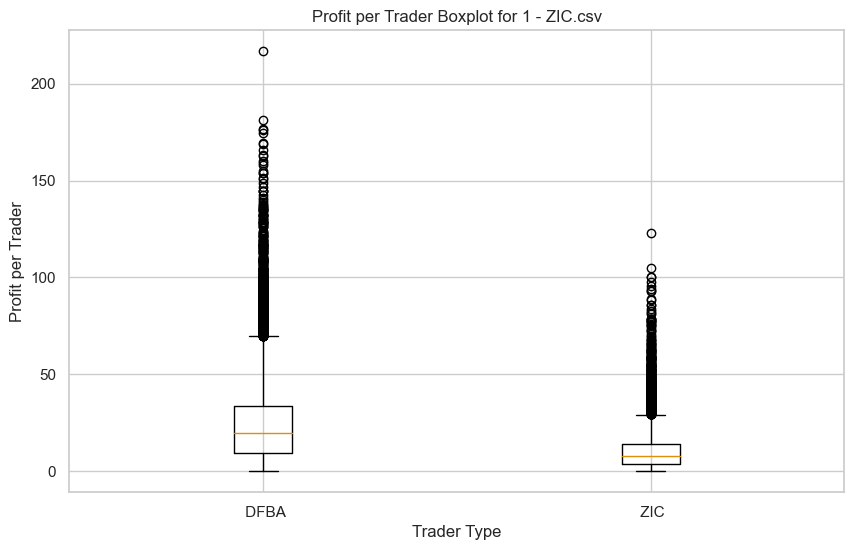

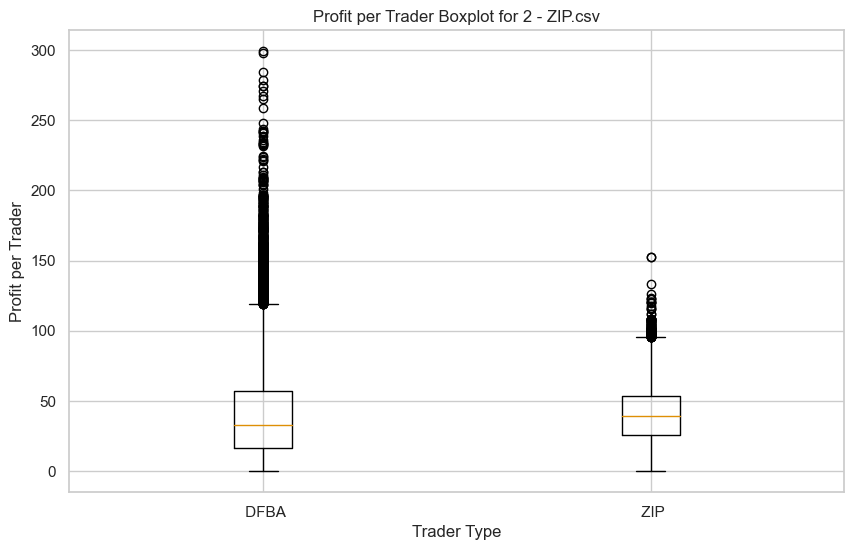

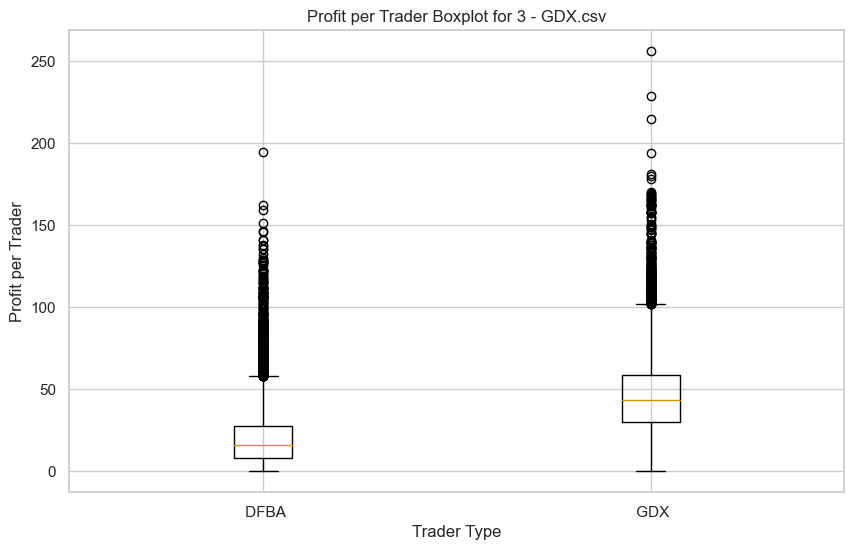

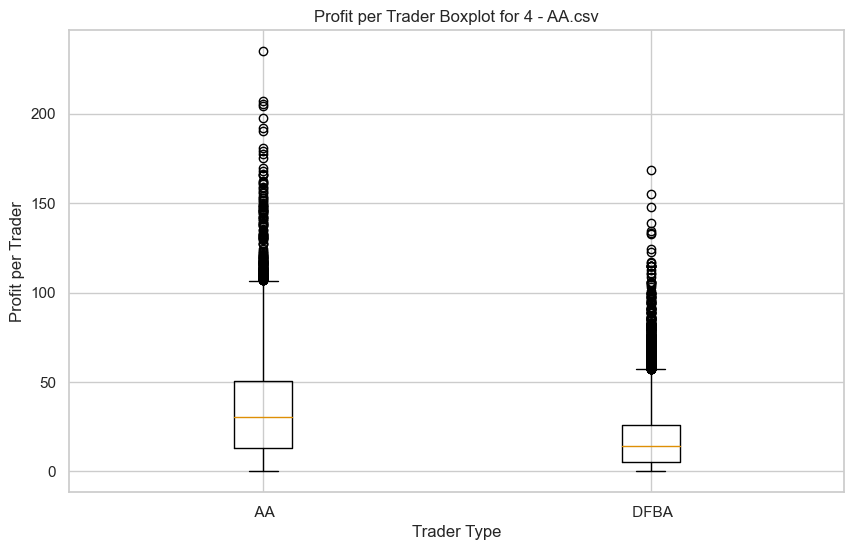

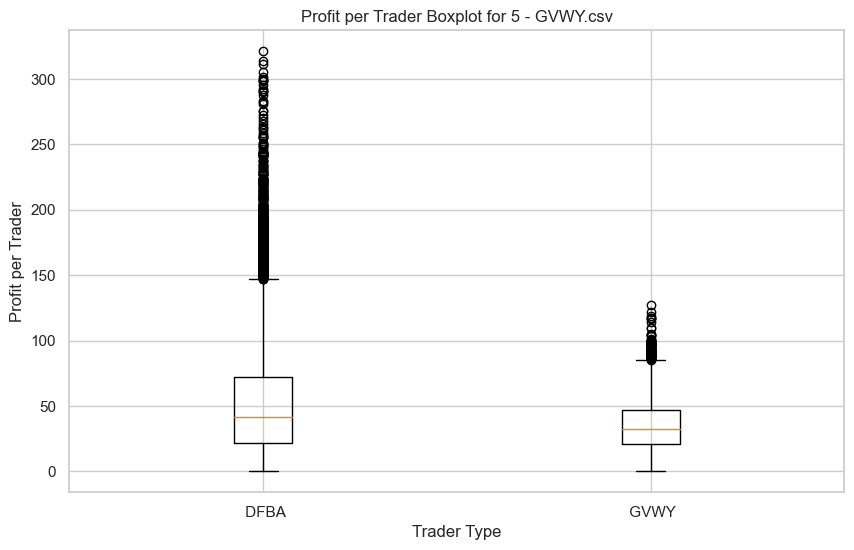

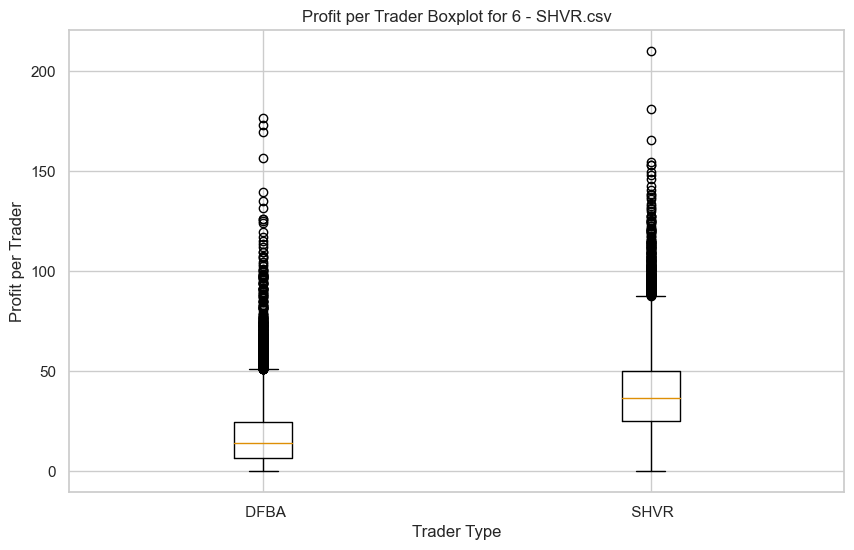

In [400]:
import os
import pandas as pd
import matplotlib.pyplot as plt

trader_files = [f'1 - ZIC.csv', '2 - ZIP.csv', '3 - GDX.csv', '4 - AA.csv', '5 - GVWY.csv', '6 - SHVR.csv']

for trader_file in trader_files:
    file_path = os.path.join(folder_path, trader_file)
    
    df = pd.read_csv(file_path)
    zeros_df = df[
        (df['Total_Profit_1'] == 0) & 
        (df['Total_Profit_2'] == 0)
    ]

    print(len(zeros_df))
    
#     df = df[
#         (df['Total_Profit_1'] != 0) & 
#         (df['Total_Profit_2'] != 0)
#     ]
    

    trader_columns = [col for col in df.columns if 'Trader_Type' in col]
    profit_columns = [col for col in df.columns if 'Profit_per_trader' in col]
    
    data = []
    labels = []
    
    for trader_col, profit_col in zip(trader_columns, profit_columns):
        data.append(df[profit_col])
        labels.append(df[trader_col].iloc[0])

    plt.figure(figsize=(10, 6))
    plt.boxplot(data, labels=labels)

    plt.title(f'Profit per Trader Boxplot for {trader_file}')
    plt.xlabel('Trader Type')
    plt.ylabel('Profit per Trader')
    

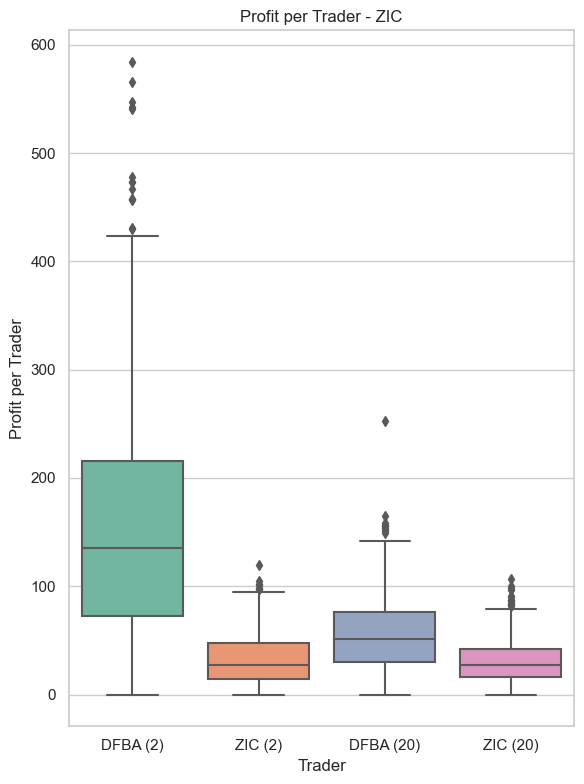

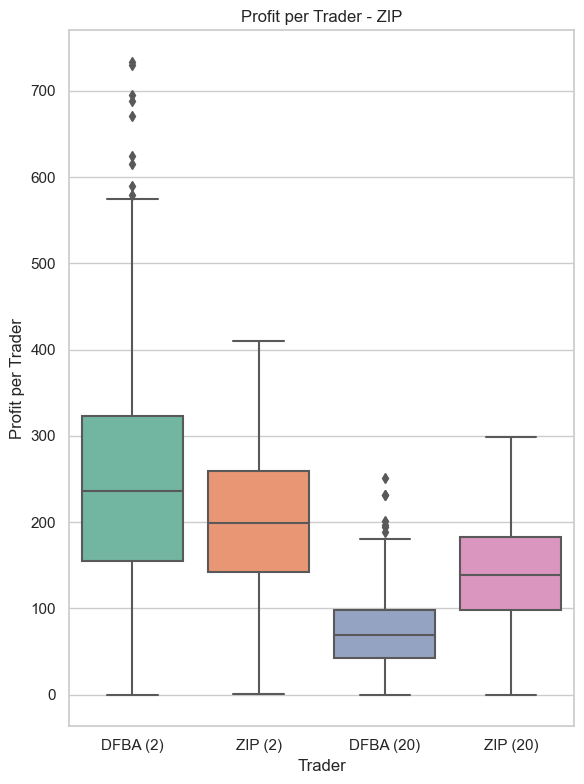

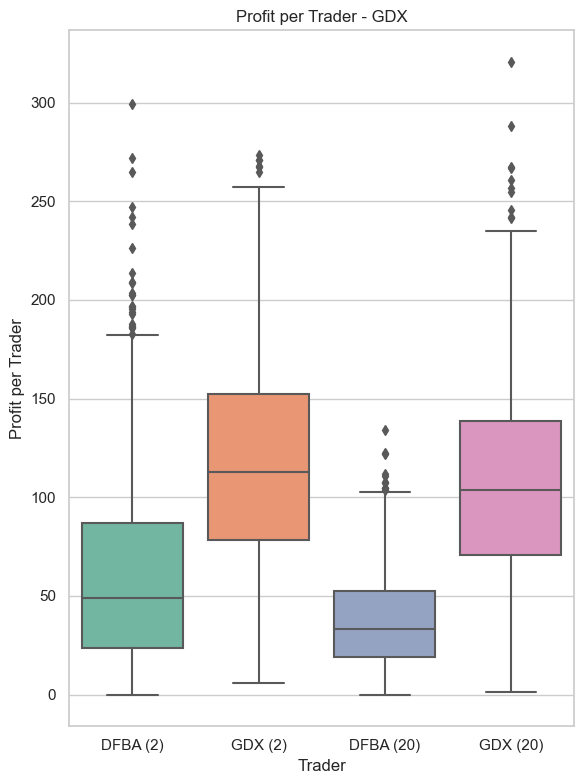

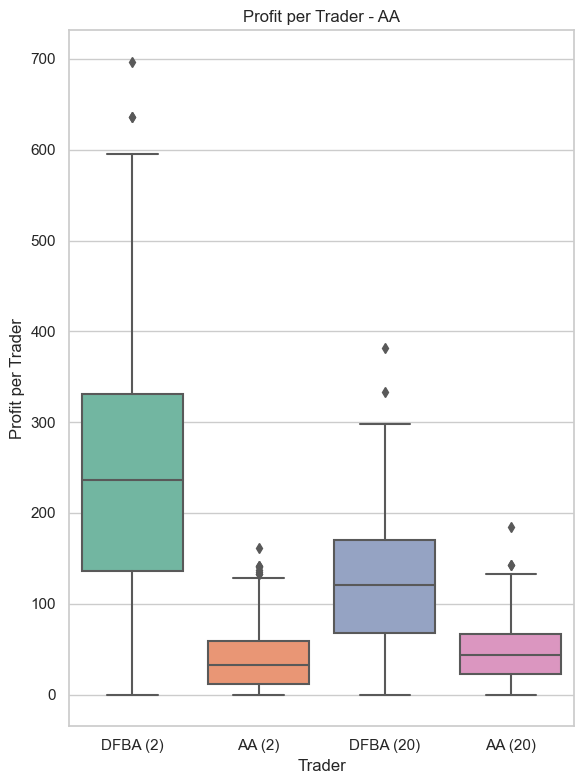

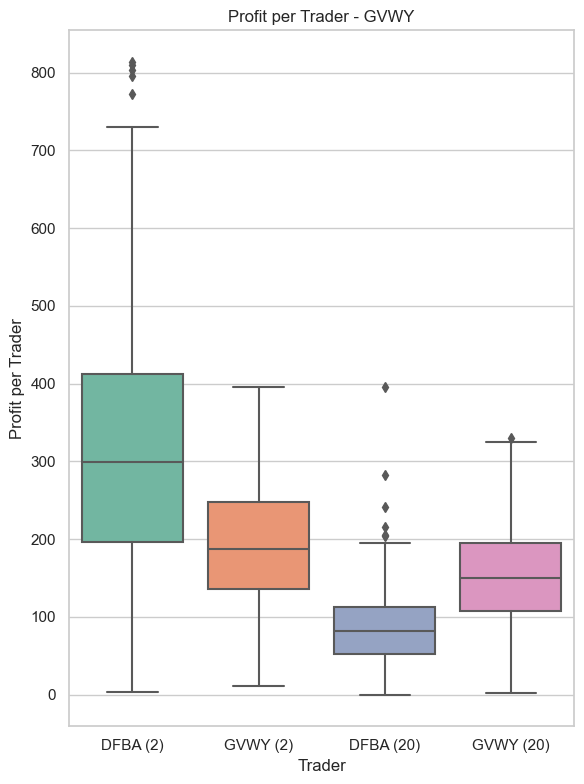

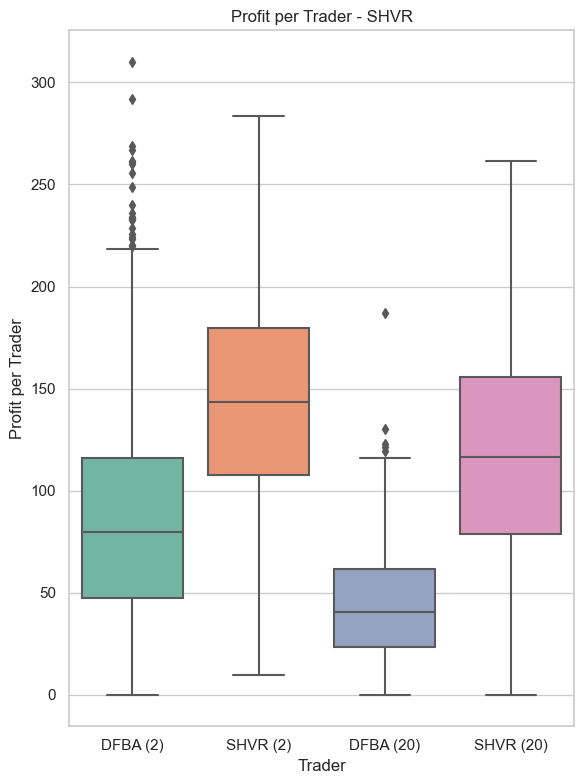

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

folder_path = r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA1 1secbatch 30sec customer order'
trader_files = [
    '1 - ZIC.csv',
    '2 - ZIP.csv',
    '3 - GDX.csv',
    '4 - AA.csv',
    '5 - GVWY.csv',
    '6 - SHVR.csv'
]

trader_type_map = {
    '1 - ZIC.csv': 'ZIC',
    '2 - ZIP.csv': 'ZIP',
    '3 - GDX.csv': 'GDX',
    '4 - AA.csv': 'AA',
    '5 - GVWY.csv': 'GVWY',
    '6 - SHVR.csv': 'SHVR'
}

data_frames = []

for trader_file in trader_files:
    file_path = os.path.join(folder_path, trader_file)
    df = pd.read_csv(file_path)
    trader_type = trader_type_map.get(trader_file, 'Unknown')
    df['Trader_Type'] = trader_type
    data_frames.append(df)

combined_df = pd.concat(data_frames, ignore_index=True)

dfba_2 = combined_df[combined_df['Num_Traders_1'] == 2]
dfba_20 = combined_df[combined_df['Num_Traders_1'] == 20]

for trader_file, trader_type in trader_type_map.items():
    plt.figure(figsize=(6, 8))
    
    dfba_2_subset = dfba_2[dfba_2['Trader_Type'] == trader_type]
    dfba_20_subset = dfba_20[dfba_20['Trader_Type'] == trader_type]
    
    plot_data = pd.concat([
        pd.DataFrame({'Trader': 'DFBA (2)', 'Profit': dfba_2_subset['Profit_per_trader_1']}),
        pd.DataFrame({'Trader': trader_type + ' (2)', 'Profit': dfba_2_subset['Profit_per_trader_2']}),
        pd.DataFrame({'Trader': 'DFBA (20)', 'Profit': dfba_20_subset['Profit_per_trader_1']}),
        pd.DataFrame({'Trader': trader_type + ' (20)', 'Profit': dfba_20_subset['Profit_per_trader_2']})
    ])
    
    sns.boxplot(x='Trader', y='Profit', data=plot_data, palette='Set2', showfliers=True)
    
    plt.title(f'Profit per Trader - {trader_type}')
    plt.xlabel('Trader')
    plt.ylabel('Profit per Trader')
    
    plt.tight_layout()
    plt.show()


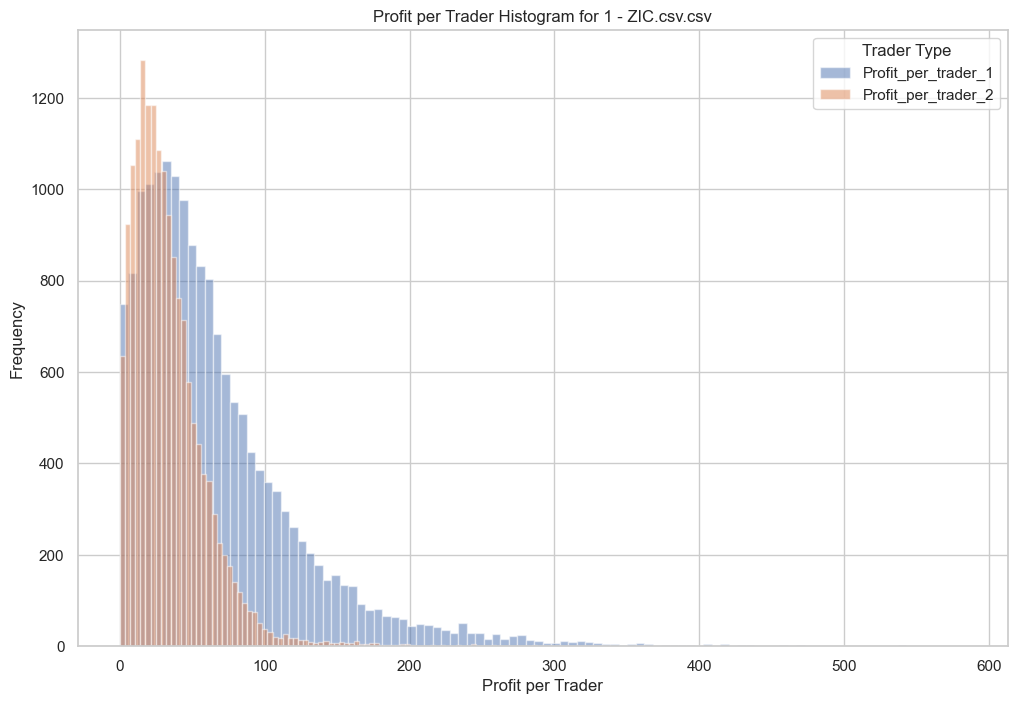

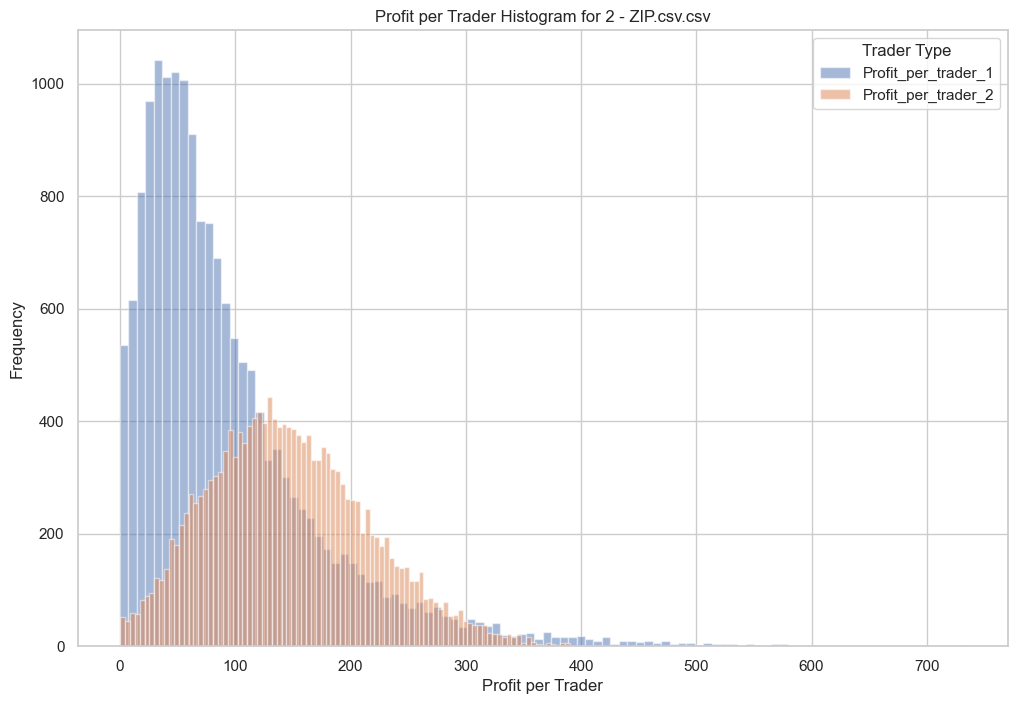

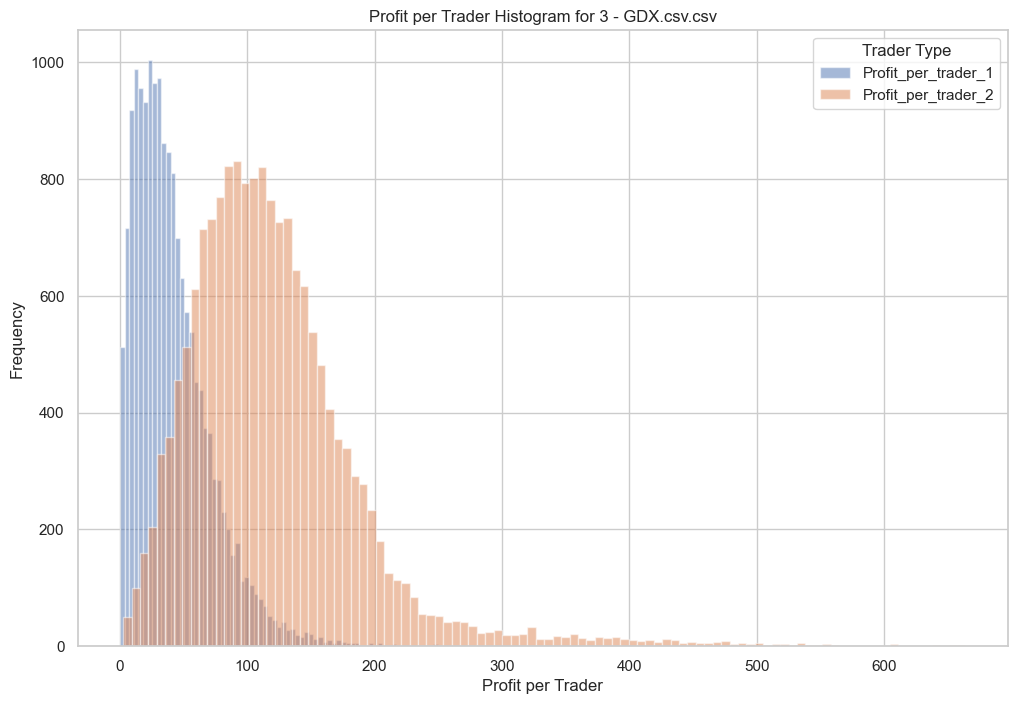

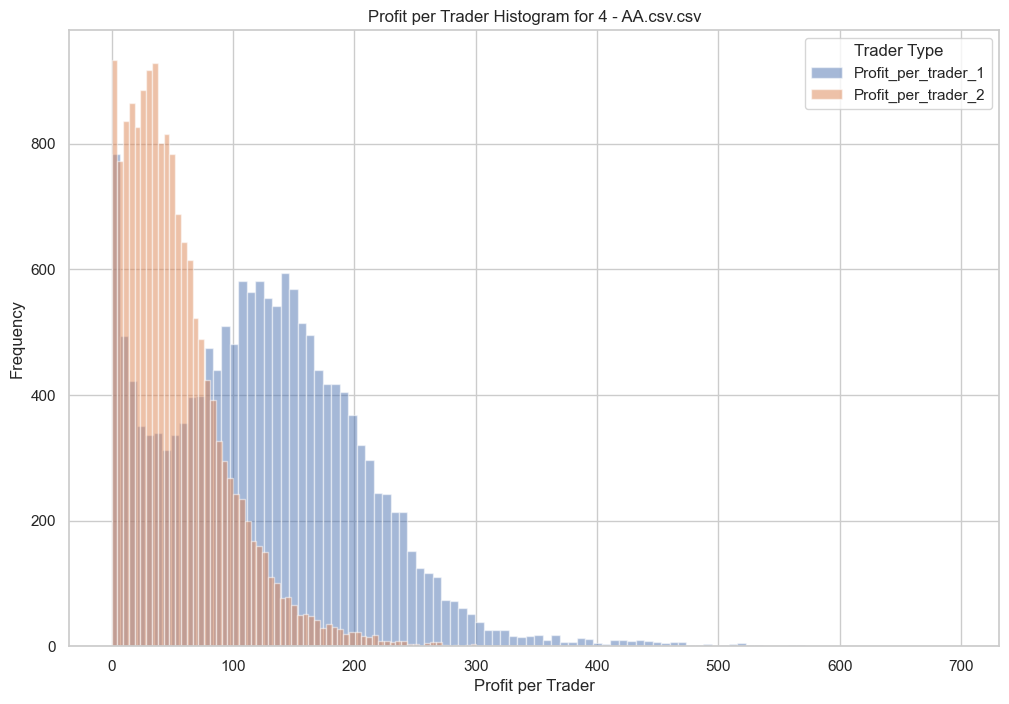

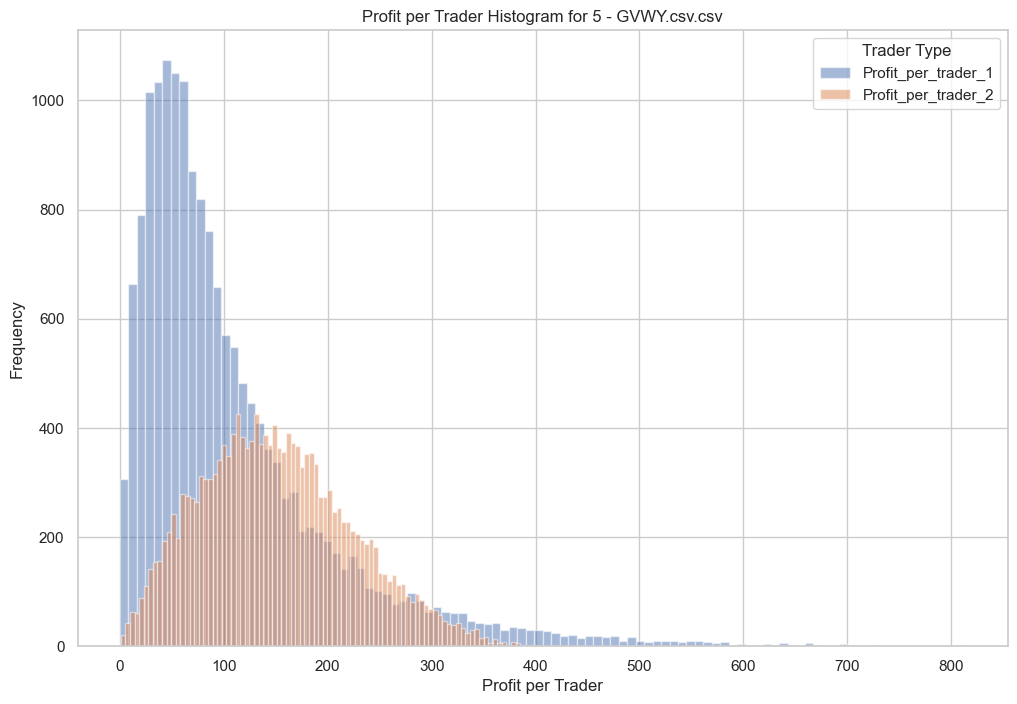

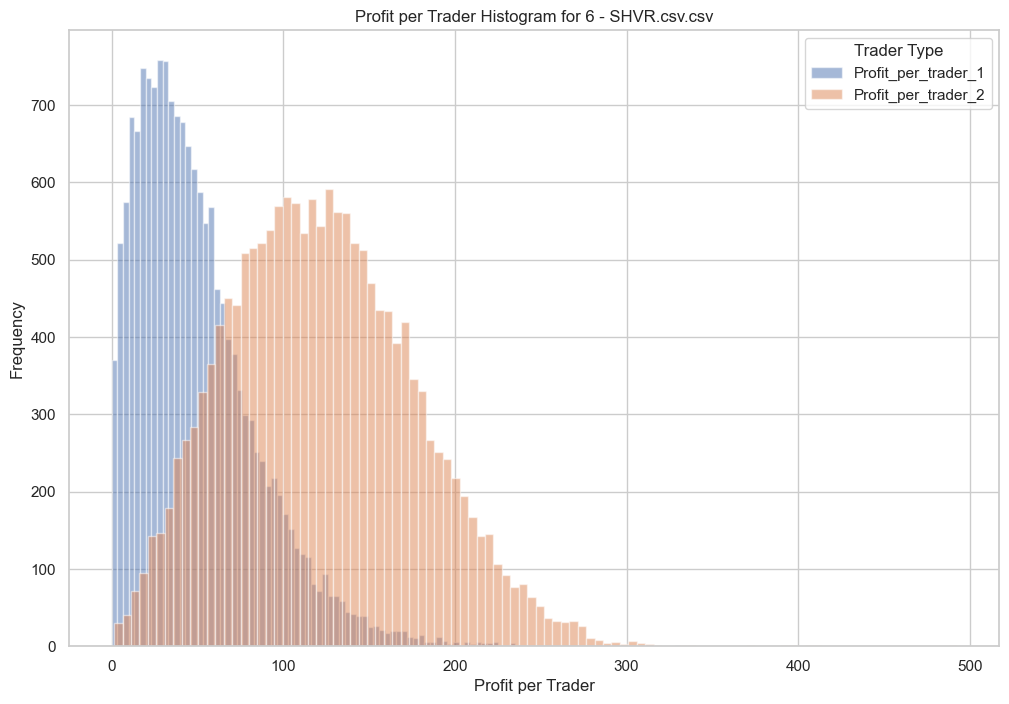

In [136]:
import os
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA1 1secbatch 30sec customer order\2 - ZIP.csv'
for trader_file in trader_files:
    file_path = os.path.join(folder_path, trader_file)
    df = pd.read_csv(file_path)

    df = df[
            (df['Total_Profit_1'] != 0) & 
            (df['Total_Profit_2'] != 0)
        ]

    profit_columns = [col for col in df.columns if 'Profit_per_trader' in col]

    plt.figure(figsize=(12, 8))

    for profit_col in profit_columns:
        plt.hist(df[profit_col], bins=100, alpha=0.5, label=profit_col)

    plt.title(f'Profit per Trader Histogram for {trader_file}.csv')
    plt.xlabel('Profit per Trader')
    plt.ylabel('Frequency')
    plt.legend(title='Trader Type')

    plt.show()



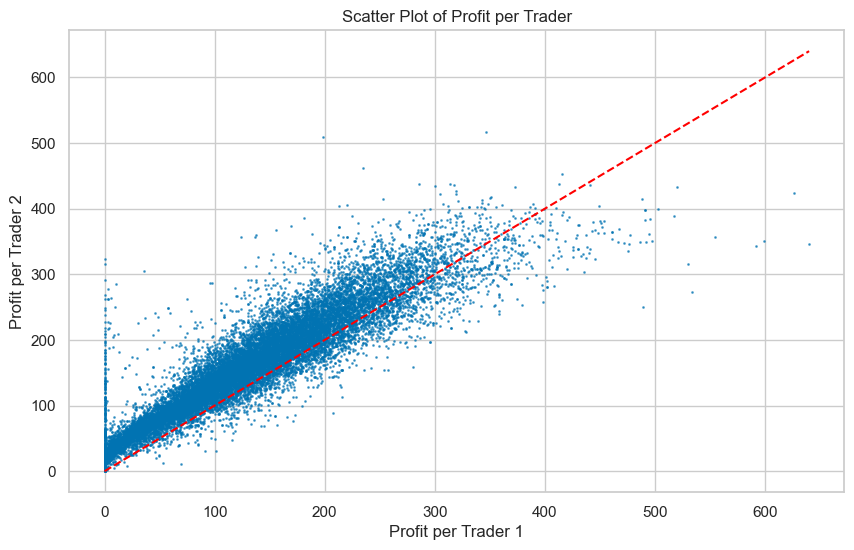

In [683]:
df = pd.read_csv(r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA2 10secbatch 30sec customer order\5 - GVWY.csv')

# df = df[
#         (df['Profit_per_trader_1'] >= 1) & 
#         (df['Profit_per_trader_2'] >= 1)
#     ]


plt.figure(figsize=(10, 6))
plt.scatter(df['Profit_per_trader_1'], df['Profit_per_trader_2'], alpha=0.6, s=1)
plt.plot([df['Profit_per_trader_1'].min(), df['Profit_per_trader_1'].max()],
         [df['Profit_per_trader_1'].min(), df['Profit_per_trader_1'].max()],
         color='red', linestyle='--')
plt.xlabel('Profit per Trader 1')
plt.ylabel('Profit per Trader 2')
plt.title('Scatter Plot of Profit per Trader')
plt.show()

In [673]:
import pandas as pd
from scipy.stats import wilcoxon
import os

folder_path = 'C:/Users/camer/Documents/Masters Thesis/Data/Testing data/DFBA2 10secbatch 30sec customer order/'
trader_files = [
    '1 - ZIC.csv',
    '2 - ZIP.csv',
    '3 - GDX.csv',
    '4 - AA.csv',
    '5 - GVWY.csv',
    '6 - SHVR.csv'
]

def swap_aa_columns(df):
    df_swapped = df.copy()
    df_swapped['Trader_Type_1'], df_swapped['Trader_Type_2'] = df['Trader_Type_2'], df['Trader_Type_1']
    df_swapped['Total_Profit_1'], df_swapped['Total_Profit_2'] = df['Total_Profit_2'], df['Total_Profit_1']
    df_swapped['Num_Traders_1'], df_swapped['Num_Traders_2'] = df['Num_Traders_2'], df['Num_Traders_1']
    df_swapped['Profit_per_trader_1'], df_swapped['Profit_per_trader_2'] = df['Profit_per_trader_2'], df['Profit_per_trader_1']
    df_swapped['Trades_Per_Trader_1'], df_swapped['Trades_Per_Trader_2'] = df['Trades_Per_Trader_2'], df['Trades_Per_Trader_1']
    df_swapped['Time_1_1'], df_swapped['Time_1_2'] = df['Time_1_2'], df['Time_1_1']
    df_swapped['Time_2_1'], df_swapped['Time_2_2'] = df['Time_2_2'], df['Time_2_1']
    return df_swapped



results = []
for trader_file in trader_files:

    file_path = f"{folder_path}/{trader_file}"
    df = pd.read_csv(file_path)
 
    if trader_file == '4 - AA.csv':
        df = swap_aa_columns(df)
 
    grouped = df.groupby('Num_Traders_1')
    
    for num_traders, group in grouped:

        stat, p = wilcoxon(group['Profit_per_trader_1'], group['Profit_per_trader_2'])
        
        result = {
            'Trader Type': trader_file.split(' - ')[1].replace('.csv', ''),
            'Num DFBA Traders': num_traders,
            'Test Statistic': stat,
            'p-value': p
        }
        results.append(result)

results_df = pd.DataFrame(results)


results_df

,Trader Type,Num DFBA Traders,Test Statistic,p-value
0,ZIC,2,24.0,2.337339e-164
1,ZIC,4,0.0,2.174062e-164
2,ZIC,6,0.0,1.493469e-164
3,ZIC,8,51.0,1.196223e-164
4,ZIC,10,362.0,3.049503e-164
...,...,...,...,...
109,SHVR,30,99887.0,1.420181e-59
110,SHVR,32,91202.0,5.148415e-67
111,SHVR,34,118610.0,1.174881e-46
112,SHVR,36,117538.5,9.046646e-47


In [674]:
dfba_results = []

for trader_file in trader_files:

    file_path = f"{folder_path}/{trader_file}"
    df = pd.read_csv(file_path)
    if trader_file == '4 - AA.csv':
        df = swap_aa_columns(df)

    grouped = df.groupby('Num_Traders_1')
    
    significant_wins = 0
    draws = 0
    losses = 0
    
    for num_traders, group in grouped:

        stat, p = wilcoxon(group['Profit_per_trader_1'], group['Profit_per_trader_2'])
        
        if p < 0.05:
            if group['Profit_per_trader_1'].mean() > group['Profit_per_trader_2'].mean():
                significant_wins += 1
            else:
                losses += 1
        else:
            draws += 1
    
    dfba_results.append({
        'Trader Type': trader_file.split(' - ')[1].replace('.csv', ''),
        'Significant DFBA Wins': significant_wins,
        'Draws': draws,
        'Losses': losses
    })

dfba_results_df = pd.DataFrame(dfba_results)

print(dfba_results_df)


  Trader Type  Significant DFBA Wins  Draws  Losses
0         ZIC                     19      0       0
1         ZIP                      1      1      17
2         GDX                     19      0       0
3          AA                     18      1       0
4        GVWY                      0      0      19
5        SHVR                      0      0      19


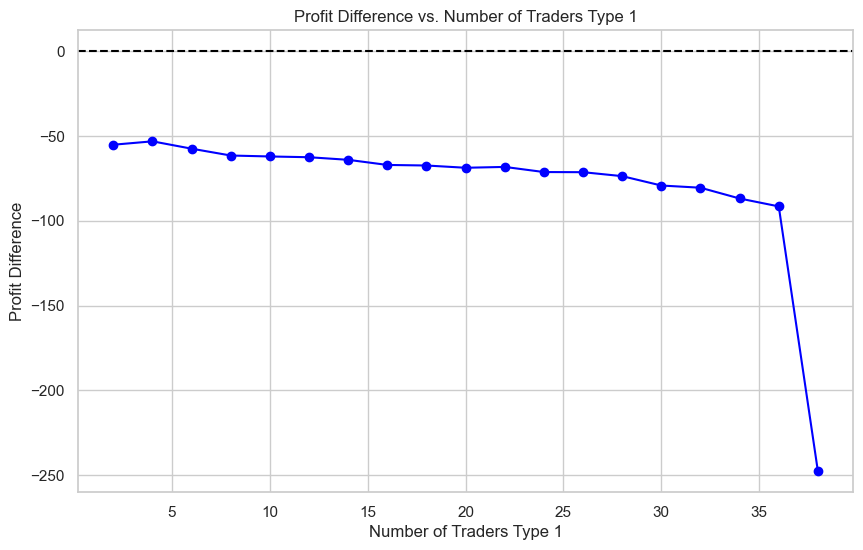

In [139]:
df = pd.read_csv(r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA1 1secbatch 30sec customer order\3 - GDX.csv')

df['Profit_Difference'] = df['Profit_per_trader_1'] - df['Profit_per_trader_2']

grouped = df.groupby('Num_Traders_1')['Profit_Difference'].mean()

plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped.values, marker='o', linestyle='-', color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Number of Traders Type 1')
plt.ylabel('Profit Difference')
plt.title('Profit Difference vs. Number of Traders Type 1')
plt.grid(True)
plt.show()


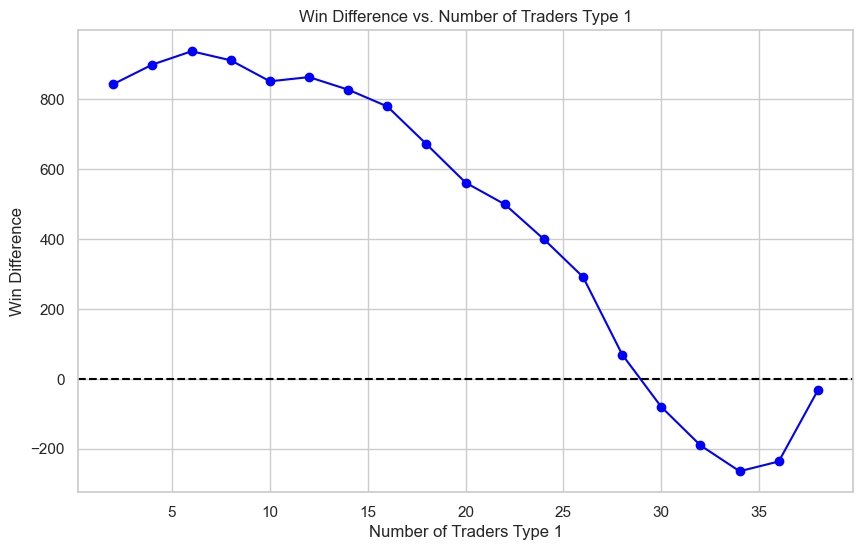

In [216]:
df = pd.read_csv(r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA1 1secbatch 120sec customer order\5 - GVWY.csv')

df['Winner'] = np.where(df['Profit_per_trader_1'] > df['Profit_per_trader_2'], df['Trader_Type_1'], df['Trader_Type_2'])

win_counts = df.groupby(['Num_Traders_1', 'Winner']).size().unstack(fill_value=0)

win_counts['Win_Difference'] = win_counts.iloc[:, 0] - win_counts.iloc[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(win_counts.index, win_counts['Win_Difference'], marker='o', linestyle='-', color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Number of Traders Type 1')
plt.ylabel('Win Difference')
plt.title('Win Difference vs. Number of Traders Type 1')
plt.grid(True)
plt.show()


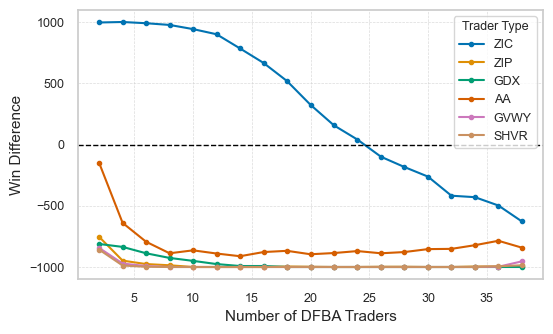

In [748]:
import pandas as pd
import matplotlib.pyplot as plt
import os

folder_path = r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA1 10secbatch 30sec customer order'
trader_files = [
    '1 - ZIC.csv',
    '2 - ZIP.csv',
    '3 - GDX.csv',
    '4 - AA.csv',
    '5 - GVWY.csv',
    '6 - SHVR.csv',
]

trader_type_map = {
    '1 - ZIC.csv': 'ZIC',
    '2 - ZIP.csv': 'ZIP',
    '3 - GDX.csv': 'GDX',
    '4 - AA.csv': 'AA',
    '5 - GVWY.csv': 'GVWY',
    '6 - SHVR.csv': 'SHVR'
}

sns.set_palette("colorblind")
colours = sns.color_palette("colorblind", len(trader_files))


plt.figure(figsize=(6, 3.5))

for i, trader_file in enumerate(trader_files):
    file_path = os.path.join(folder_path, trader_file)
    df = pd.read_csv(file_path)
    
    df['Winner'] = np.where(df['Profit_per_trader_1'] > df['Profit_per_trader_2'], df['Trader_Type_1'], df['Trader_Type_2'])

    if trader_file == '4 - AA.csv':
        win_counts = df.groupby(['Num_Traders_2', 'Winner']).size().unstack(fill_value=0)
        win_counts['Win_Difference'] = - win_counts.iloc[:, 0] + win_counts.iloc[:, 1]
    else:
        win_counts = df.groupby(['Num_Traders_1', 'Winner']).size().unstack(fill_value=0)
        win_counts['Win_Difference'] = win_counts.iloc[:, 0] - win_counts.iloc[:, 1]
    

    plt.plot(win_counts.index, win_counts['Win_Difference'], 
             linestyle='-', marker='o', label=trader_type_map[trader_file], color=colours[i],
             markersize=3, linewidth=1.5)

plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Number of DFBA Traders', fontsize=11)
plt.ylabel('Win Difference', fontsize=11)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.ylim(-1100, 1100)

plt.legend(title='Trader Type', title_fontsize=9, loc='upper right', fontsize=9)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.savefig('C:/Users/camer/Documents/Masters Thesis/Deep-Learning-Trader-BFBSE/Figures/Trader comparisons/Win_Difference_DFBA1_10secbatch_30seccust.png', dpi=300, bbox_inches='tight')
plt.show()

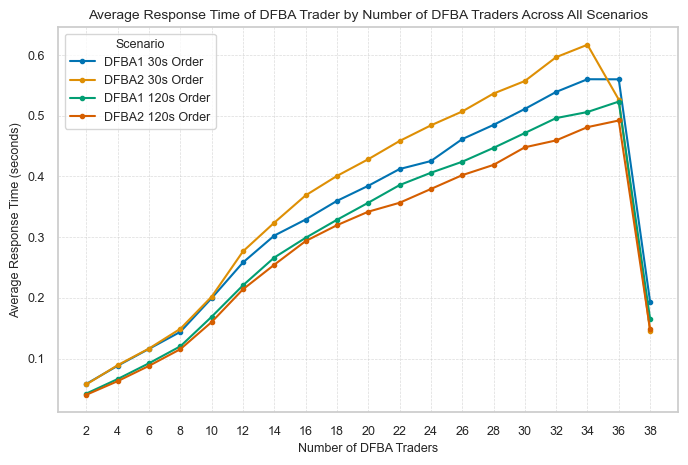

In [605]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


folder_paths = {
    'DFBA1 30s Order': r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA1 1secbatch 30sec customer order',
    'DFBA2 30s Order': r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA2 1secbatch 30sec customer order',
    'DFBA1 120s Order': r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA1 1secbatch 120sec customer order',
    'DFBA2 120s Order': r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA2 1secbatch 120sec customer order'
}

trader_files = [
    '1 - ZIC.csv',
    '2 - ZIP.csv',
    '3 - GDX.csv',
    '4 - AA.csv',
    '5 - GVWY.csv',
    '6 - SHVR.csv'
]


sns.set_palette("colorblind")
scenarios = list(folder_paths.keys())
colours = sns.color_palette("colorblind", len(scenarios))

response_times = {}

for scenario, folder_path in folder_paths.items():
    response_time_data = []

    for trader_file in trader_files:
        file_path = os.path.join(folder_path, trader_file)
        df = pd.read_csv(file_path)
        response_time_data.append(df[['Num_Traders_1', 'Time_1_1']])

    combined_df = pd.concat(response_time_data)
    average_response_time = combined_df.groupby('Num_Traders_1')['Time_1_1'].mean()
    
    response_times[scenario] = average_response_time

plt.figure(figsize=(8, 5))

for i, (scenario, avg_response_time) in enumerate(response_times.items()):
    plt.plot(avg_response_time.index, avg_response_time.values, linestyle='-', marker='o', 
             label=scenario, color=colours[i], markersize=3, linewidth=1.5)

plt.title('Average Response Time of DFBA Trader by Number of DFBA Traders Across All Scenarios', fontsize=10)
plt.xlabel('Number of DFBA Traders', fontsize=9)
plt.ylabel('Average Response Time (seconds)', fontsize=9)
plt.xticks(sorted(average_response_time.index), fontsize=9)
plt.yticks(fontsize=9)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(title='Scenario', title_fontsize=9, loc='upper left', fontsize=9)

output_file_path = 'C:/Users/camer/Documents/Masters Thesis/Deep-Learning-Trader-BFBSE/Figures/DFBA_Response_Time.png'
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')

plt.show()

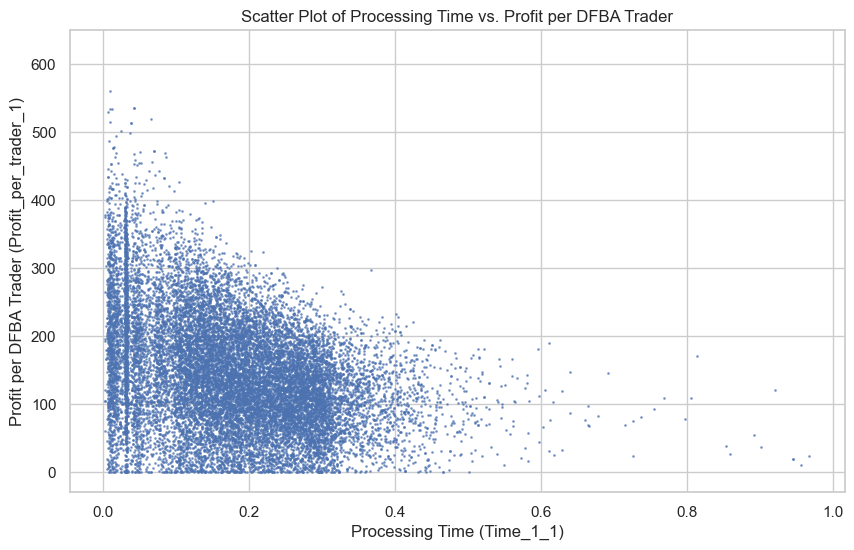

In [262]:
file_path = r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA2 10secbatch 30sec customer order\2 - ZIP.csv'
df = pd.read_csv(file_path)
df_filtered = df[df['Time_1_1'] <= 1]

plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Time_1_1'], df_filtered['Profit_per_trader_1'], alpha=0.6, s=1)

plt.xlabel('Processing Time (Time_1_1)')
plt.ylabel('Profit per DFBA Trader (Profit_per_trader_1)')
plt.ylim(-30,650)
plt.title('Scatter Plot of Processing Time vs. Profit per DFBA Trader')

plt.grid(True)

plt.show()


C:\Users\camer\AppData\Local\Temp\ipykernel_23648\1666340246.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Time_Bin'] = pd.cut(df_filtered['Time_1_1'], bins=bin_edges)
C:\Users\camer\AppData\Local\Temp\ipykernel_23648\1666340246.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Winner'] = np.where(df_filtered['Profit_per_trader_1'] > df_filtered['Profit_per_trader_2'], 'DFBA', 'Other')


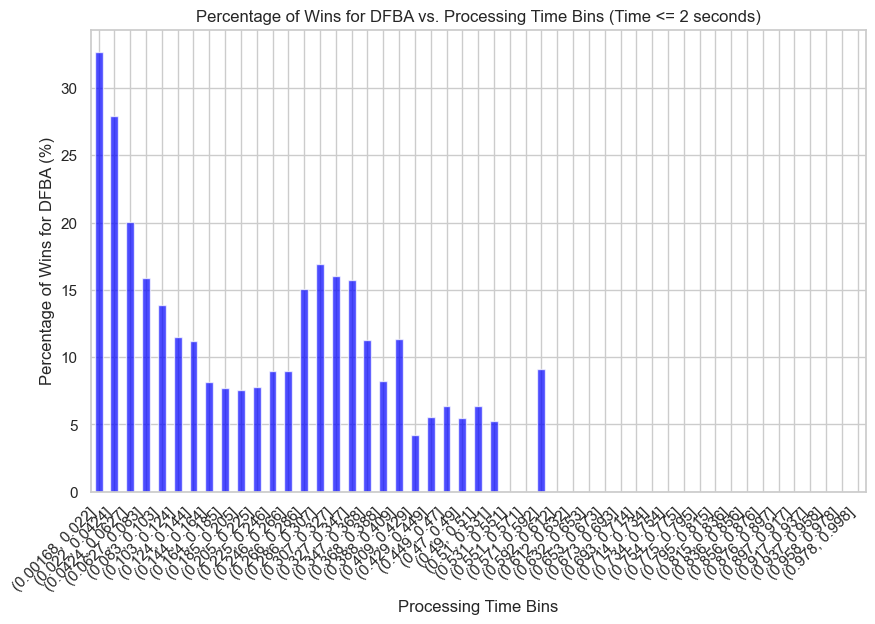

In [264]:
file_path = r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA2 10secbatch 30sec customer order\5 - GVWY.csv'
df = pd.read_csv(file_path)

df_filtered = df[df['Time_1_1'] <= 1]

bin_edges = np.linspace(df_filtered['Time_1_1'].min(), df_filtered['Time_1_1'].max(), num=50)
df_filtered['Time_Bin'] = pd.cut(df_filtered['Time_1_1'], bins=bin_edges)

df_filtered['Winner'] = np.where(df_filtered['Profit_per_trader_1'] > df_filtered['Profit_per_trader_2'], 'DFBA', 'Other')

total_counts = df_filtered.groupby('Time_Bin').size()
win_counts = df_filtered[df_filtered['Winner'] == 'DFBA'].groupby('Time_Bin').size()

win_percentage = (win_counts / total_counts) * 100

plt.figure(figsize=(10, 6))
win_percentage.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Processing Time Bins')
plt.ylabel('Percentage of Wins for DFBA (%)')
plt.title('Percentage of Wins for DFBA vs. Processing Time Bins (Time <= 2 seconds)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


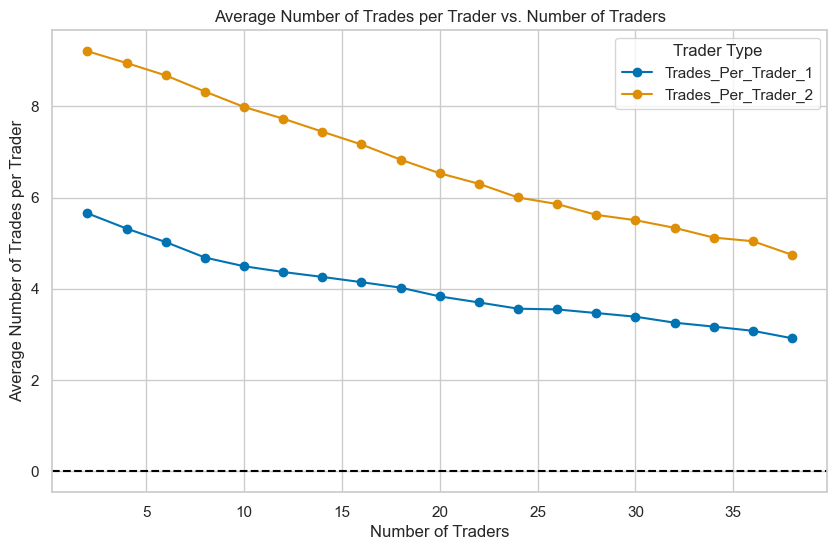

In [687]:
df = pd.read_csv(r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA2 10secbatch 30sec customer order\6 - SHVR.csv')

trade_columns = ['Trades_Per_Trader_1', 'Trades_Per_Trader_2']

plt.figure(figsize=(10, 6))

for trade_col in trade_columns:
    grouped = df.groupby('Num_Traders_1')[trade_col].mean()
    plt.plot(grouped.index, grouped.values, marker='o', linestyle='-', label=trade_col)

plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Number of Traders')
plt.ylabel('Average Number of Trades per Trader')
plt.title('Average Number of Trades per Trader vs. Number of Traders')
plt.legend(title='Trader Type')
plt.grid(True)
plt.show()


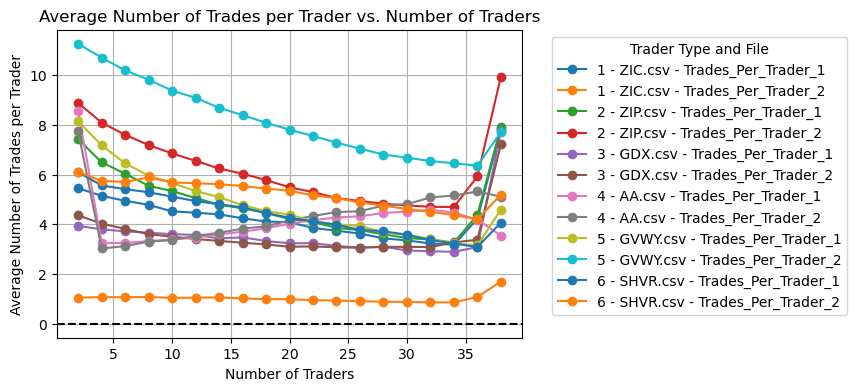

In [118]:
folder_path = r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA2 1secbatch 30sec customer order'
trader_files = ['1 - ZIC.csv', '2 - ZIP.csv', '3 - GDX.csv', '4 - AA.csv', '5 - GVWY.csv', '6 - SHVR.csv']

plt.figure(figsize=(6, 4))

for trader_file in trader_files:
    file_path = os.path.join(folder_path, trader_file)
    
    df = pd.read_csv(file_path)
    
    trade_columns = ['Trades_Per_Trader_1', 'Trades_Per_Trader_2']
    
    for trade_col in trade_columns:
        grouped = df.groupby('Num_Traders_1')[trade_col].mean()
        plt.plot(grouped.index, grouped.values, marker='o', linestyle='-', label=f'{trader_file} - {trade_col}')
        
plt.axhline(0, color='black', linestyle='--')

plt.xlabel('Number of Traders')
plt.ylabel('Average Number of Trades per Trader')
plt.title('Average Number of Trades per Trader vs. Number of Traders')
plt.legend(title='Trader Type and File', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()


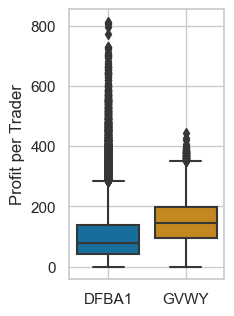

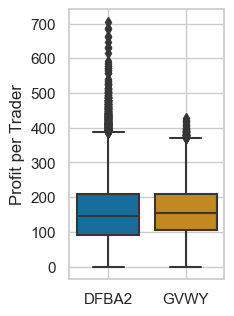

In [749]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

folders = {
    'DFBA1': r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA1 1secbatch 30sec customer order',
    'DFBA2': r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA2 1secbatch 30sec customer order'
}

results_file = '5 - GVWY.csv'

for dfba_type, folder in folders.items():
    file_path = os.path.join(folder, results_file)
    df = pd.read_csv(file_path)
    
    profit_data = df[['Profit_per_trader_1', 'Profit_per_trader_2']].copy()
    profit_data.columns = [dfba_type, 'GVWY']
    
    plt.figure(figsize=(2, 3.5))
    sns.boxplot(data=profit_data.melt(var_name='Trader', value_name='Profit'), x='Trader', y='Profit')
    plt.ylabel('Profit per Trader')
    plt.xlabel('')
    plt.grid(True)

    plt.savefig(f'C:/Users/camer/Documents/Masters Thesis/Deep-Learning-Trader-BFBSE/Figures/Trader comparisons/{dfba_type}_vs_GVWY_Profit_Boxplot_30sec.png', dpi=300, bbox_inches='tight')
    plt.show()

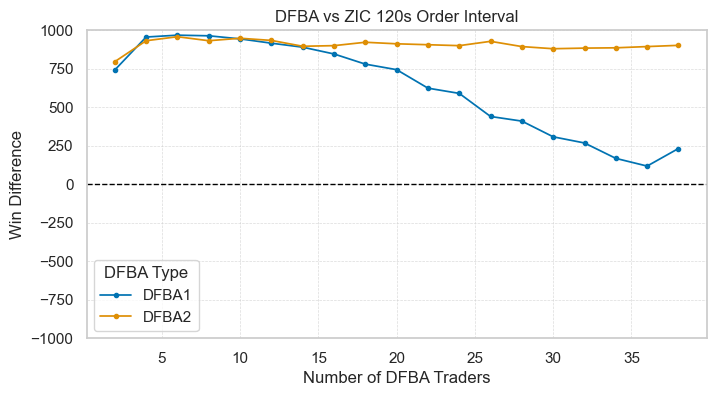

In [710]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

folders = {
    'DFBA1': r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA1 1secbatch 120sec customer order',
    'DFBA2': r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA2 1secbatch 120sec customer order'
}

zic_file = '1 - ZIC.csv'

plt.figure(figsize=(8, 4))

for dfba_type, folder in folders.items():
    file_path = os.path.join(folder, zic_file)
    df = pd.read_csv(file_path)
    
    df['Trader_Type_1'] = dfba_type
    df['Trader_Type_2'] = 'ZIC'
    
    df['Winner'] = np.where(df['Profit_per_trader_1'] > df['Profit_per_trader_2'], df['Trader_Type_1'], df['Trader_Type_2'])
    
    win_counts = df.groupby(['Num_Traders_1', 'Winner']).size().unstack(fill_value=0)
    
    win_counts['Win_Difference'] = win_counts[dfba_type] - win_counts['ZIC']
    
    plt.plot(win_counts.index, win_counts['Win_Difference'], marker='o', linestyle='-', label=f'{dfba_type}', markersize=3, linewidth=1.25)

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Number of DFBA Traders')
plt.ylabel('Win Difference')
plt.ylim(-1000,1000)
plt.title('DFBA vs ZIC 120s Order Interval')
plt.legend(title='DFBA Type')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.savefig('C:/Users/camer/Documents/Masters Thesis/Deep-Learning-Trader-BFBSE/Figures/Trader comparisons/DFBA_vs_ZIC_Win_Difference_120sec_cust.png', dpi=300, bbox_inches='tight')
plt.show()


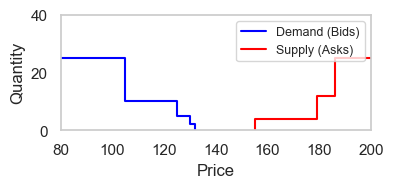

In [724]:
import matplotlib.pyplot as plt

bid_prices = [132, 132, 130, 125, 105, 75]
bid_quantities = [0, 2, 3, 5, 15, 8]

ask_prices = [155, 155, 179, 186, 215]
ask_quantities = [0, 4, 8, 13, 11]

cumulative_bid_quantities = [sum(bid_quantities[:i+1]) for i in range(len(bid_quantities))]
cumulative_ask_quantities = [sum(ask_quantities[:i+1]) for i in range(len(ask_quantities))]

plt.figure(figsize=(4, 1.5))

plt.step(bid_prices, cumulative_bid_quantities, label='Demand (Bids)', color='blue', where='post')

plt.step(ask_prices, cumulative_ask_quantities, label='Supply (Asks)', color='red', where='post')

plt.xlabel('Price')
plt.ylabel('Quantity')
plt.ylim(0, 40)
plt.xlim(80, 200)
# plt.title('Supply and Demand Curve')
plt.legend(fontsize=9, loc='upper right')

plt.grid(False)
plt.savefig('C:/Users/camer/Documents/Masters Thesis/Deep-Learning-Trader-BFBSE/Figures/LOB_diagram', dpi=300, bbox_inches='tight')
plt.show()
